# Proyecto: Prediccion de diabetes

**Integrantes:**
-  Hilter Piero Lanche Cerron
-  Jorge Andres Chavarri Centeno
-  Joel Joseph Rivera Matias

# 📌 Fase 1. Business Understanding

## 🎯 1. Objetivo

El objetivo de este proyecto es desarrollar un **modelo predictivo** que permita predecir si una persona tendra **diabetes** (variable QS109) a partir de características sociodemográficas, clínicas y de estilo de vida, específicamente:  

- **Edad de la persona** (QS23)
- **Sexo** (QS14)
- **Mediciones antropométricas**: peso (QS900), talla (QS901), perímetro abdominal (QS907).
- **Presión arterial**: sistólica y diastólica (QS903S, QS903D, QS905S, QS905D), y diagnóstico de hipertensión (QS102).
- **Estilo de vida**: consumo de tabaco (QS200–QS205) y alcohol (QS206–QS210).
- **Dieta**: frecuencia de consumo de frutas, verduras y jugos (QS213C–QS220CV).

**Metricas tecnicas:**
- Exactitud (Accuracy)	≥ 0.70	≥ 0.80	Un modelo de salud debe ser consistente en su prediccion
- Precisión (Precision)	≥ 0.65	≥ 0.75	Evita falsos positivos innecesarios (personas sanas marcadas como diabéticas).
- AUC-ROC	≥ 0.75	≥ 0.85	Capacidad de discriminar entre personas con y sin diabetes.

**Metricas de negocio:**

- Capacidad del modelo para identificar individuos en riesgo usando solo variables sociodemográficas, clínicas básicas y de estilo de vida, sin exámenes de laboratorio.
- Reducción de costos: potencial de disminuir gastos en pruebas médicas invasivas al focalizar recursos en quienes tienen mayor probabilidad de diabetes.
- Prevención y detección temprana: contribuir a que los sistemas de salud puedan diseñar programas preventivos dirigidos a los grupos de mayor riesgo.


# 📌 Fase 2. Data Understanding

## 📥 2. Data collection

In [53]:
import pandas as pd
import numpy as np


data = pd.read_csv("CSALUD01_2024.csv",
                   low_memory=False ,
                    encoding='utf-8',      # o 'latin-1' si hay caracteres especiales
                    sep=',',               # separador (por defecto es coma)
                    header=0,              # fila que contiene los nombres de columnas
                    index_col=None)        # si quieres usar una columna como índice

In [54]:
# Resumen general
data.info()
print('data.columns:',data.columns)
print('data.shape:',data.shape)
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31484 entries, 0 to 31483
Columns: 258 entries, ID1 to PESO15_AMAS
dtypes: float64(226), int64(28), object(4)
memory usage: 62.0+ MB
data.columns: Index(['ID1', 'HHID', 'QHCLUSTER', 'QHNUMBER', 'QHHOME', 'QSNUMERO', 'QSINTM',
       'QSINTY', 'QSTOTVISIT', 'QSRESULT',
       ...
       'QS731_E', 'QS731_EA', 'QS731_F', 'QS731_G', 'QS731_H', 'QS731_I',
       'QS731_J', 'QS731_X', 'QS731_Y', 'PESO15_AMAS'],
      dtype='object', length=258)
data.shape: (31484, 258)


,ID1,HHID,QHCLUSTER,QHNUMBER,QHHOME,QSNUMERO,QSINTM,QSINTY,QSTOTVISIT,QSRESULT,...,QS731_E,QS731_EA,QS731_F,QS731_G,QS731_H,QS731_I,QS731_J,QS731_X,QS731_Y,PESO15_AMAS
0,2024,325503101,3255,31,1,2,5,2024,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157182.172078
1,2024,325503901,3255,39,1,2,5,2024,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200845.215117
2,2024,325504001,3255,40,1,1,5,2024,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,432165.467954
3,2024,325504701,3255,47,1,1,5,2024,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162338.353517
4,2024,325505001,3255,50,1,2,5,2024,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162338.353517
5,2024,325505301,3255,53,1,1,5,2024,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122249.475108
6,2024,325508901,3255,89,1,2,5,2024,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122249.475108
7,2024,325509301,3255,93,1,2,5,2024,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200845.215117
8,2024,325509701,3255,97,1,1,5,2024,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213186.731519
9,2024,325600601,3256,6,1,1,6,2024,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135655.313927


El **data frame** contenía **259 variables**, correspondientes a una encuesta amplia. Sin embargo, para iniciar el análisis descriptivo y facilitar la interpretación de resultados y la visualizacion de los graficos estadisticos, se redujo a **29 variables** seleccionadas, priorizando aquellas de mayor relevancia temática en relación con el estudio

In [55]:
# Crear nuevo dataframe con solo las columnas seleccionadas
data = data[['QSSEXO', 'QS23', 'QS102', 'QS109', 'QS202', 'QS203C',
              'QS205C', 'QS206', 'QS207C', 'QS208', 'QS209','QS210', 
              'QS212A','QS212G', 'QS211C', 'QS213C',
              'QS218C', 'QS219C', 'QS200', 'QS201', 'QS304', 'QS500',
              'QS900', 'QS901', 'QS903S', 'QS903D', 'QS905S', 'QS905D',
              'QS907']]


In [56]:
# Resumen general
data.info()
print('data.columns:',data.columns)
print('data.shape:',data.shape)
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31484 entries, 0 to 31483
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   QSSEXO  31484 non-null  int64  
 1   QS23    31484 non-null  int64  
 2   QS102   31481 non-null  float64
 3   QS109   31481 non-null  float64
 4   QS202   2896 non-null   float64
 5   QS203C  356 non-null    float64
 6   QS205C  356 non-null    float64
 7   QS206   31467 non-null  float64
 8   QS207C  28525 non-null  float64
 9   QS208   28886 non-null  float64
 10  QS209   21129 non-null  float64
 11  QS210   21129 non-null  float64
 12  QS212A  10312 non-null  float64
 13  QS212G  10312 non-null  float64
 14  QS211C  10312 non-null  float64
 15  QS213C  28434 non-null  float64
 16  QS218C  5415 non-null   float64
 17  QS219C  22778 non-null  float64
 18  QS200   31467 non-null  float64
 19  QS201   4929 non-null   float64
 20  QS304   8186 non-null   float64
 21  QS500   31457 non-null  float64
 22

,QSSEXO,QS23,QS102,QS109,QS202,QS203C,QS205C,QS206,QS207C,QS208,...,QS201,QS304,QS500,QS900,QS901,QS903S,QS903D,QS905S,QS905D,QS907
0,2,38,2.0,2.0,NaN,NaN,NaN,1.0,17.0,2.0,...,NaN,NaN,1.0,70.4,152.5,126.0,93.0,123.0,95.0,98.9
1,2,17,2.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,2.0,49.8,160.2,86.0,68.0,90.0,65.0,68.4
2,2,65,2.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,2.0,2.0,49.7,136.2,123.0,79.0,121.0,74.0,86.3
3,1,33,2.0,2.0,2.0,NaN,NaN,1.0,17.0,1.0,...,1.0,NaN,2.0,76.0,158.2,123.0,89.0,118.0,87.0,100.4
4,1,30,2.0,2.0,NaN,NaN,NaN,1.0,21.0,2.0,...,NaN,NaN,2.0,66.0,159.4,107.0,70.0,119.0,72.0,87.2
5,2,32,2.0,2.0,NaN,NaN,NaN,1.0,18.0,1.0,...,NaN,NaN,2.0,72.9,157.0,128.0,88.0,126.0,86.0,91.7
6,2,34,2.0,2.0,NaN,NaN,NaN,1.0,26.0,2.0,...,NaN,NaN,2.0,57.3,153.3,90.0,56.0,96.0,65.0,80.2
7,2,18,2.0,2.0,NaN,NaN,NaN,1.0,17.0,1.0,...,NaN,NaN,2.0,67.6,151.5,105.0,75.0,108.0,74.0,93.2
8,1,45,2.0,2.0,NaN,NaN,NaN,1.0,19.0,1.0,...,NaN,NaN,2.0,85.7,171.6,133.0,88.0,134.0,87.0,101.1
9,2,33,2.0,2.0,NaN,NaN,NaN,1.0,24.0,1.0,...,NaN,NaN,2.0,81.2,158.3,109.0,75.0,108.0,75.0,108.1


## 📊 3. Descriptive analysis

### 3.1 Análisis descriptivo

In [57]:
#Resumen estadístico de todas las variables (describe()).
data.describe(include="all").T 

,count,mean,std,min,25%,50%,75%,max
QSSEXO,31484.0,1.579247,0.493688,1.0,1.0,2.0,2.0,2.0
QS23,31484.0,39.886387,16.973088,15.0,27.0,36.0,50.0,97.0
QS102,31481.0,1.917220,0.320334,1.0,2.0,2.0,2.0,8.0
QS109,31481.0,1.969092,0.254248,1.0,2.0,2.0,2.0,8.0
QS202,2896.0,1.876727,0.328808,1.0,2.0,2.0,2.0,2.0
QS203C,356.0,25.671348,11.532263,10.0,18.0,21.0,30.0,78.0
QS205C,356.0,4.303371,4.003251,1.0,2.0,3.0,5.0,20.0
QS206,31467.0,1.082785,0.285085,1.0,1.0,1.0,1.0,8.0
QS207C,28525.0,19.123050,4.876925,5.0,16.0,18.0,20.0,68.0
QS208,28886.0,1.269785,0.453577,1.0,1.0,1.0,2.0,8.0


In [59]:
# Separar los datos segú sus Tipos de variables (numéricas, categóricas). fechas se considera como cat aunque también puedes separr
#numeric_data = data.select_dtypes(include=[np.number])
#categor_data = data.select_dtypes(exclude=[np.number])
#print ("Hay {} variables númericas y {} categóricas en la data".format(numeric_data.shape[1],categor_data.shape[1]))

In [60]:
# Puedes ver la Distribución de variables numéricas
# data.describe().T

In [72]:
#Variables únicas en cada variable
#categor_data.describe(include="all").T

In [61]:
from IPython.display import Markdown, display

# Diccionario de etiquetas (Código → Descripción)
labels = {
    'QSSEXO': "SEXO",
    'QS23': "EDAD",
    'QS102': "Le diagnosticaron Hipertensión Arterial o Presión Alta",
    'QS202': "Fuma diariamente",
    'QS207C': "Edad que empezó a fumar diariamente",
    'QS209': "En los últimos 12 meses ha consumido alguna bebida alcohólica",
    'QS219C': "Días que comió ensalada de verduras",
    'QS900': "Peso (kg) - Personas de 15 años a más",
    'QS901': "Talla (cm) - Personas de 15 años a más",
    'QS907': "Perímetro abdominal (cm)",
    'QS206' : "asda",
    'QS905S': "Segunda medición presión arterial diastólica",
    'QS905D': "Segunda medición presión arterial sistólica"
}

# Conteo de valores únicos con etiqueta arriba
for col in labels.keys():
    display(Markdown(f"\n##### {col} → {labels[col]}"))
    print(data[col].value_counts())



# Conteo de la variable objetivo
display(Markdown("\n\n### QS109 → Le diagnosticaron diabetes"))
data["QS109"].value_counts()



##### QSSEXO → SEXO

QSSEXO
2    18237
1    13247
Name: count, dtype: int64



##### QS23 → EDAD

QS23
32    976
31    967
36    942
29    930
30    918
     ... 
94     12
97      9
96      9
93      6
95      4
Name: count, Length: 83, dtype: int64



##### QS102 → Le diagnosticaron Hipertensión Arterial o Presión Alta

QS102
2.0    28735
1.0     2726
8.0       20
Name: count, dtype: int64



##### QS202 → Fuma diariamente

QS202
2.0    2539
1.0     357
Name: count, dtype: int64



##### QS207C → Edad que empezó a fumar diariamente

QS207C
18.0    5432
20.0    4289
17.0    3281
15.0    2782
16.0    2544
19.0    1925
25.0    1289
14.0    1112
22.0    1093
21.0     714
23.0     623
30.0     616
24.0     460
13.0     412
12.0     343
28.0     263
26.0     188
27.0     170
35.0     150
10.0     127
40.0     125
11.0      72
32.0      63
29.0      55
8.0       46
33.0      45
38.0      38
50.0      38
45.0      33
34.0      20
36.0      19
9.0       19
48.0      17
37.0      12
42.0      11
31.0      10
60.0      10
39.0       9
55.0       8
7.0        8
43.0       7
46.0       7
49.0       5
41.0       5
44.0       4
51.0       3
6.0        3
63.0       3
58.0       3
54.0       2
59.0       2
47.0       2
64.0       2
68.0       1
52.0       1
62.0       1
57.0       1
53.0       1
5.0        1
Name: count, dtype: int64



##### QS209 → En los últimos 12 meses ha consumido alguna bebida alcohólica

QS209
2.0    17218
1.0     3892
8.0       19
Name: count, dtype: int64



##### QS219C → Días que comió ensalada de verduras

QS219C
2.0    5791
3.0    4801
1.0    4716
7.0    3850
4.0    2210
5.0    1097
6.0     313
Name: count, dtype: int64



##### QS900 → Peso (kg) - Personas de 15 años a más

QS900
999.9    408
63.4     127
61.7     113
70.0     113
61.6     111
        ... 
112.9      1
116.7      1
126.2      1
131.0      1
113.5      1
Name: count, Length: 915, dtype: int64



##### QS901 → Talla (cm) - Personas de 15 años a más

QS901
999.9    408
154.0    187
156.0    169
152.5    168
154.5    168
        ... 
190.2      1
124.8      1
184.0      1
132.3      1
183.0      1
Name: count, Length: 555, dtype: int64



##### QS907 → Perímetro abdominal (cm)

QS907
999.9    827
90.5     171
89.5     153
90.0     147
94.5     144
        ... 
124.4      1
56.5       1
132.1      1
136.3      1
129.5      1
Name: count, Length: 773, dtype: int64



##### QS206 → asda

QS206
1.0    28886
2.0     2577
8.0        4
Name: count, dtype: int64



##### QS905S → Segunda medición presión arterial diastólica

QS905S
110.0    875
105.0    847
108.0    843
107.0    837
115.0    837
        ... 
63.0       1
70.0       1
65.0       1
210.0      1
219.0      1
Name: count, Length: 146, dtype: int64



##### QS905D → Segunda medición presión arterial sistólica

QS905D
72.0     1329
70.0     1322
75.0     1249
71.0     1247
76.0     1230
         ... 
130.0       1
124.0       1
131.0       1
126.0       1
123.0       1
Name: count, Length: 95, dtype: int64




### QS109 → Le diagnosticaron diabetes

QS109
2.0    30326
1.0     1129
8.0       26
Name: count, dtype: int64

### 3.2 Análisis descriptivo (gráficos)

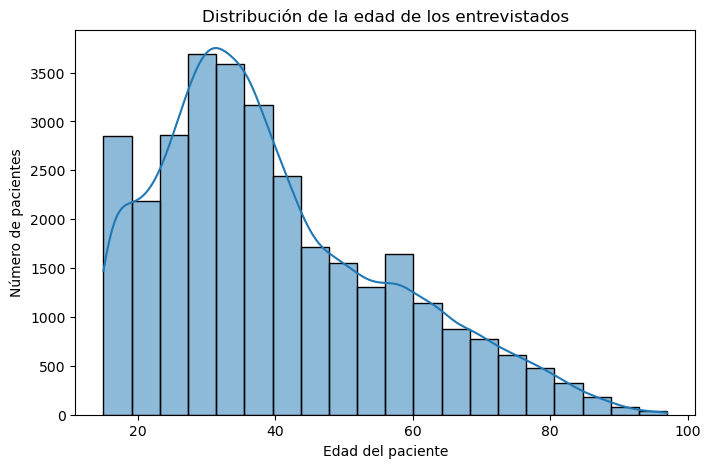

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de la edad de los pacientes
plt.figure(figsize=(8,5))
sns.histplot(data['QS23'], bins=20, kde=True)
plt.title("Distribución de la edad de los entrevistados")
plt.xlabel("Edad del paciente")
plt.ylabel("Número de pacientes")
plt.show()

👉 El gráfico muestra que la mayoría de los entrevistados se concentra en edades jóvenes y adultas jóvenes, principalmente entre los 20 y 40 años, mientras que a partir de los 50 años la frecuencia comienza a disminuir de forma progresiva y en los 70 años o más los casos son poco representativos. Esto indica que la muestra está compuesta mayoritariamente por población en edad productiva, con menor proporción de adultos mayores.

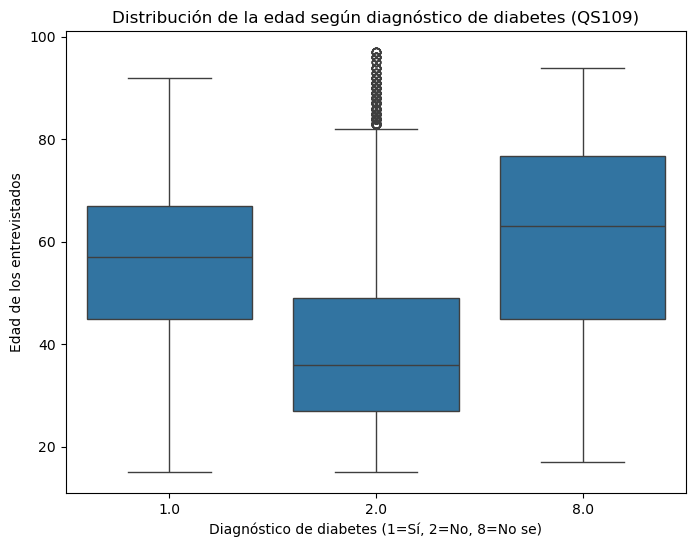

In [63]:
# Relación entre Edad y Diagnostico de Diabetes
plt.figure(figsize=(8,6))  # tamaño más compacto que con 18
sns.boxplot(x="QS109", y="QS23", data=data)  # QS109 = sí/no, QS23 = edad
plt.xlabel("Diagnóstico de diabetes (1=Sí, 2=No, 8=No se)")
plt.ylabel("Edad de los entrevistados")
plt.title("Distribución de la edad según diagnóstico de diabetes (QS109)")
plt.show()

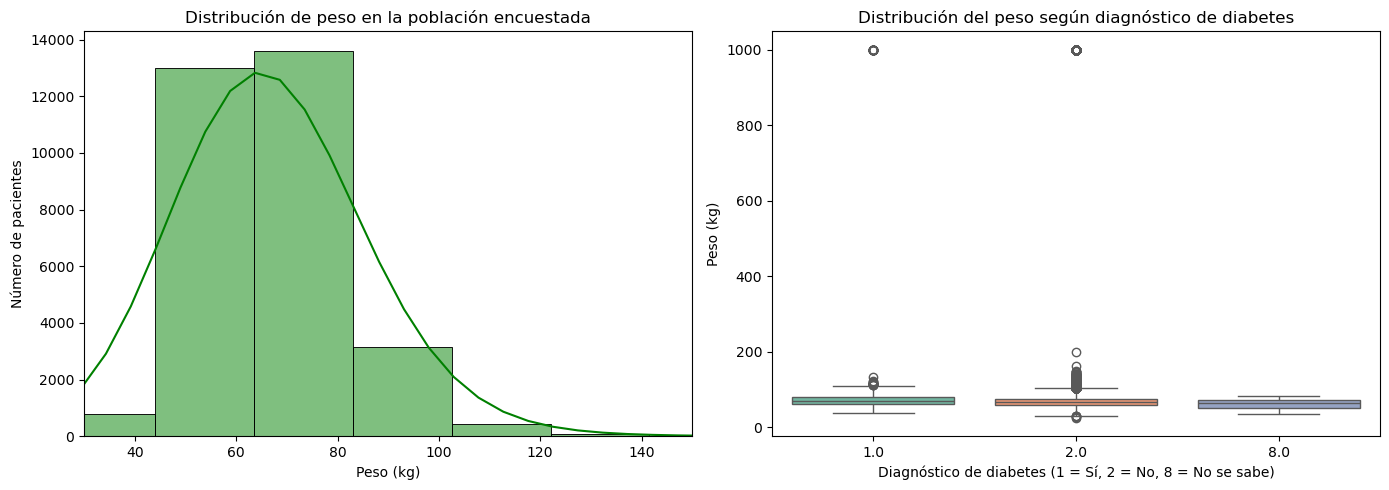

In [64]:
# Distribución del peso (histograma general)
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)  # lado izquierdo
sns.histplot(data['QS900'], bins=50, kde=True, color="green")
plt.xlim(30, 150)
plt.xlabel("Peso (kg)")
plt.ylabel("Número de pacientes")
plt.title("Distribución de peso en la población encuestada")

# Comparación del peso según diabetes (boxplot)
plt.subplot(1,2,2)  # lado derecho
sns.boxplot(y='QS900', x='QS109', hue='QS109', data=data, palette="Set2", legend=False)
plt.xlabel("Diagnóstico de diabetes (1 = Sí, 2 = No, 8 = No se sabe)")
plt.ylabel("Peso (kg)")
plt.title("Distribución del peso según diagnóstico de diabetes")

plt.tight_layout()
plt.show()


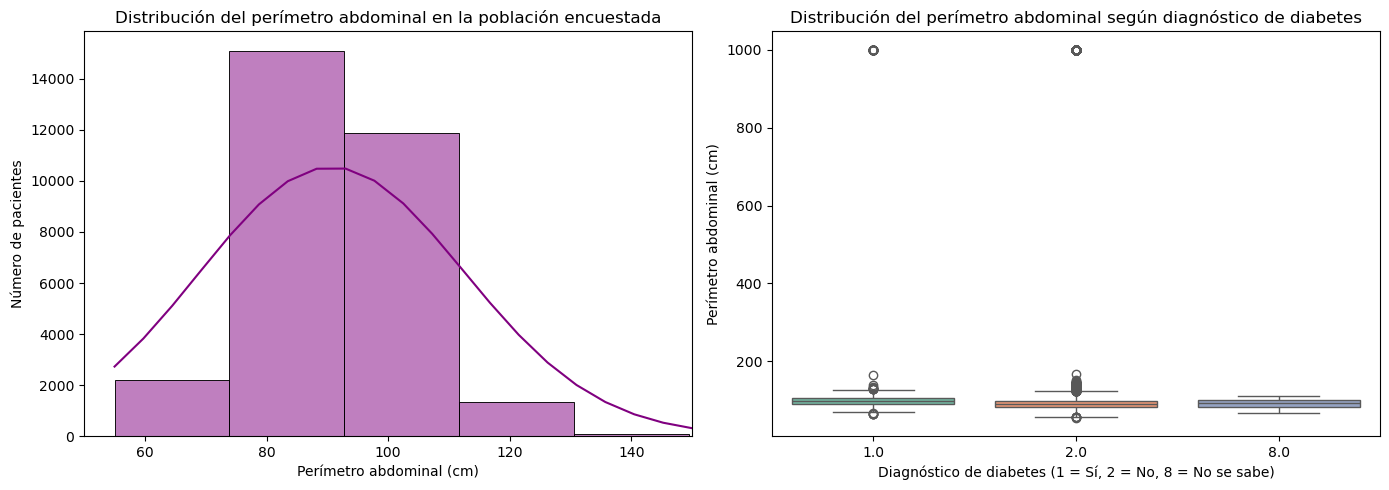

In [65]:
plt.figure(figsize=(14,5))

# Histograma
plt.subplot(1,2,1)
sns.histplot(data['QS907'], bins=50, kde=True, color="purple")
plt.xlim(50, 150)  # rango típico en cm
plt.xlabel("Perímetro abdominal (cm)")
plt.ylabel("Número de pacientes")
plt.title("Distribución del perímetro abdominal en la población encuestada")

# Boxplot según diabetes
plt.subplot(1,2,2)
sns.boxplot(x='QS109', y='QS907', hue='QS109', data=data, palette="Set2", legend=False)
plt.xlabel("Diagnóstico de diabetes (1 = Sí, 2 = No, 8 = No se sabe)")
plt.ylabel("Perímetro abdominal (cm)")
plt.title("Distribución del perímetro abdominal según diagnóstico de diabetes")

plt.tight_layout()
plt.show()

/tmp/ipykernel_33/3511522870.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='QS206', data=diabeticos, palette="Set2")


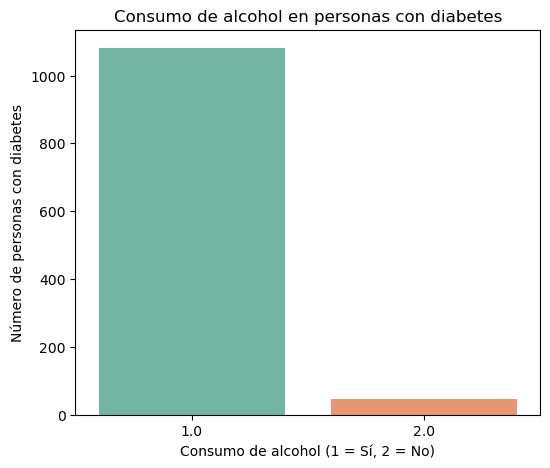

In [66]:
# Filtrar solo personas con diabetes (QS109 = 1)
diabeticos = data[data['QS109'] == 1]

plt.figure(figsize=(6,5))
sns.countplot(x='QS206', data=diabeticos, palette="Set2")
plt.xlabel("Consumo de alcohol (1 = Sí, 2 = No)")
plt.ylabel("Número de personas con diabetes")
plt.title("Consumo de alcohol en personas con diabetes")
plt.show()

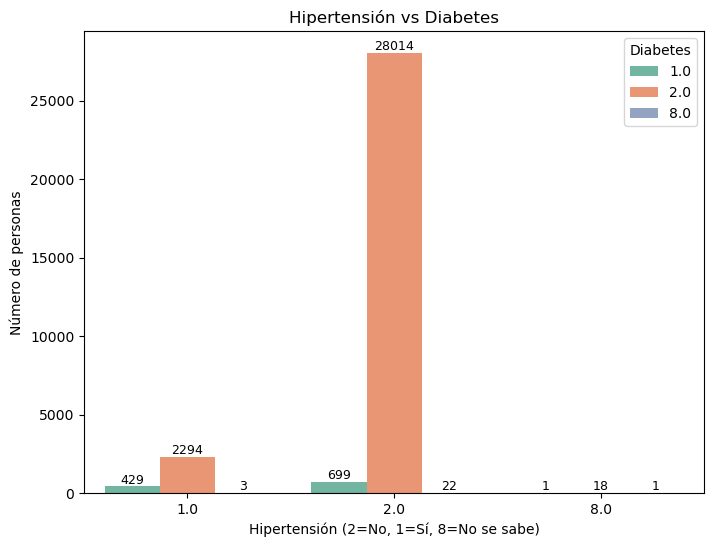

In [67]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='QS102', hue='QS109', data=data, palette='Set2')

plt.title("Hipertensión vs Diabetes")
plt.xlabel("Hipertensión (2=No, 1=Sí, 8=No se sabe)")
plt.ylabel("Número de personas")
plt.legend(title="Diabetes")

# Agregar los valores en cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

plt.show()

### 3.3 Análisis exploratorio (con estadísticas): Correlaciones y cruces de variables

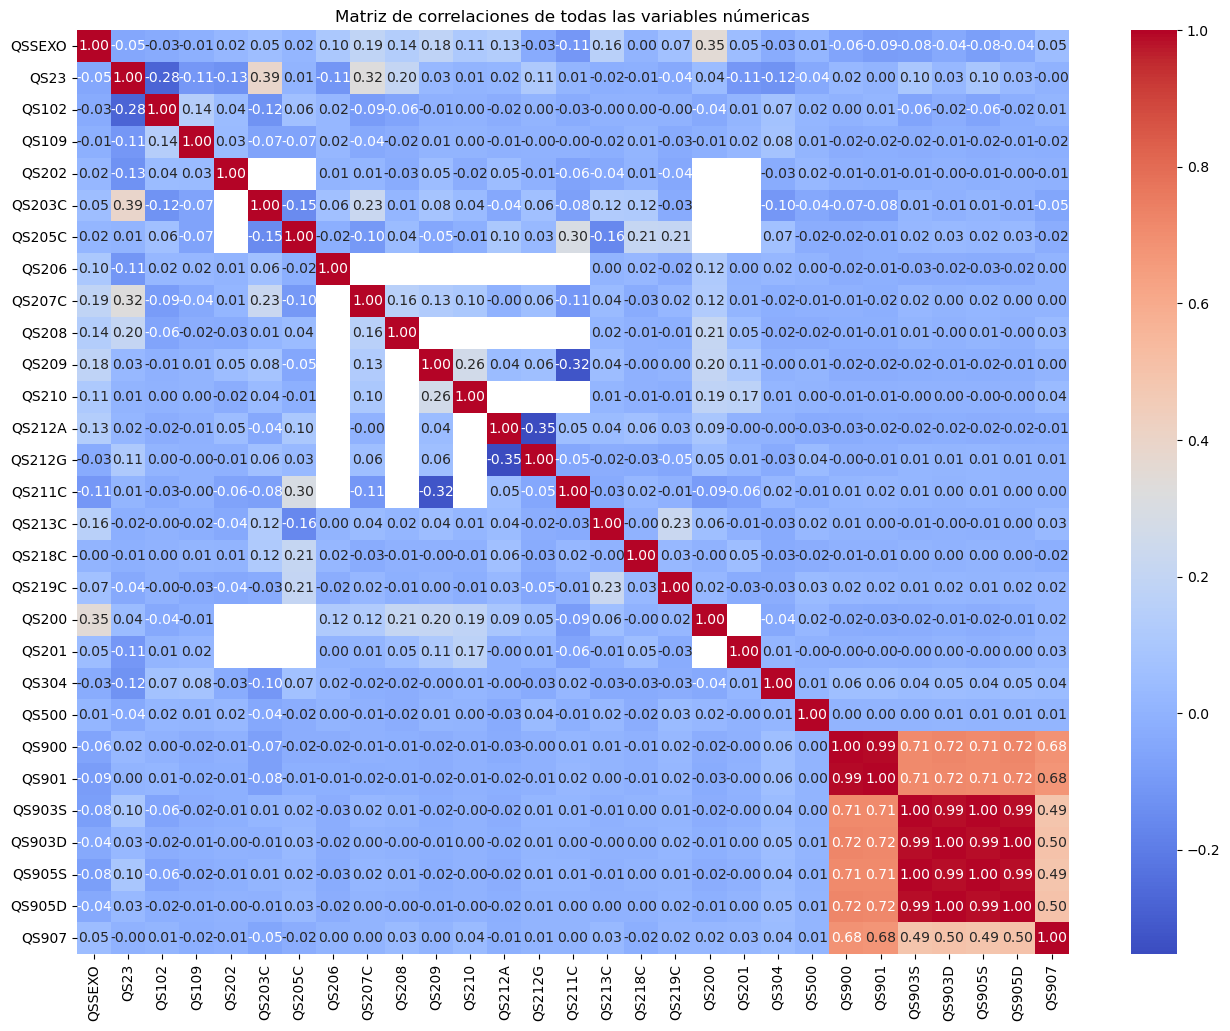

QSSEXO,1,2
QS109,,
1.0,37.732507,62.267493
2.0,42.240981,57.759019
8.0,38.461538,61.538462


In [68]:
# Correlaciones de todas las variables númericas
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlaciones de todas las variables númericas")
plt.show()

# Cruce de variables categóricas con el objetivo
pd.crosstab(data['QS109'], data['QSSEXO'], normalize='index') * 100

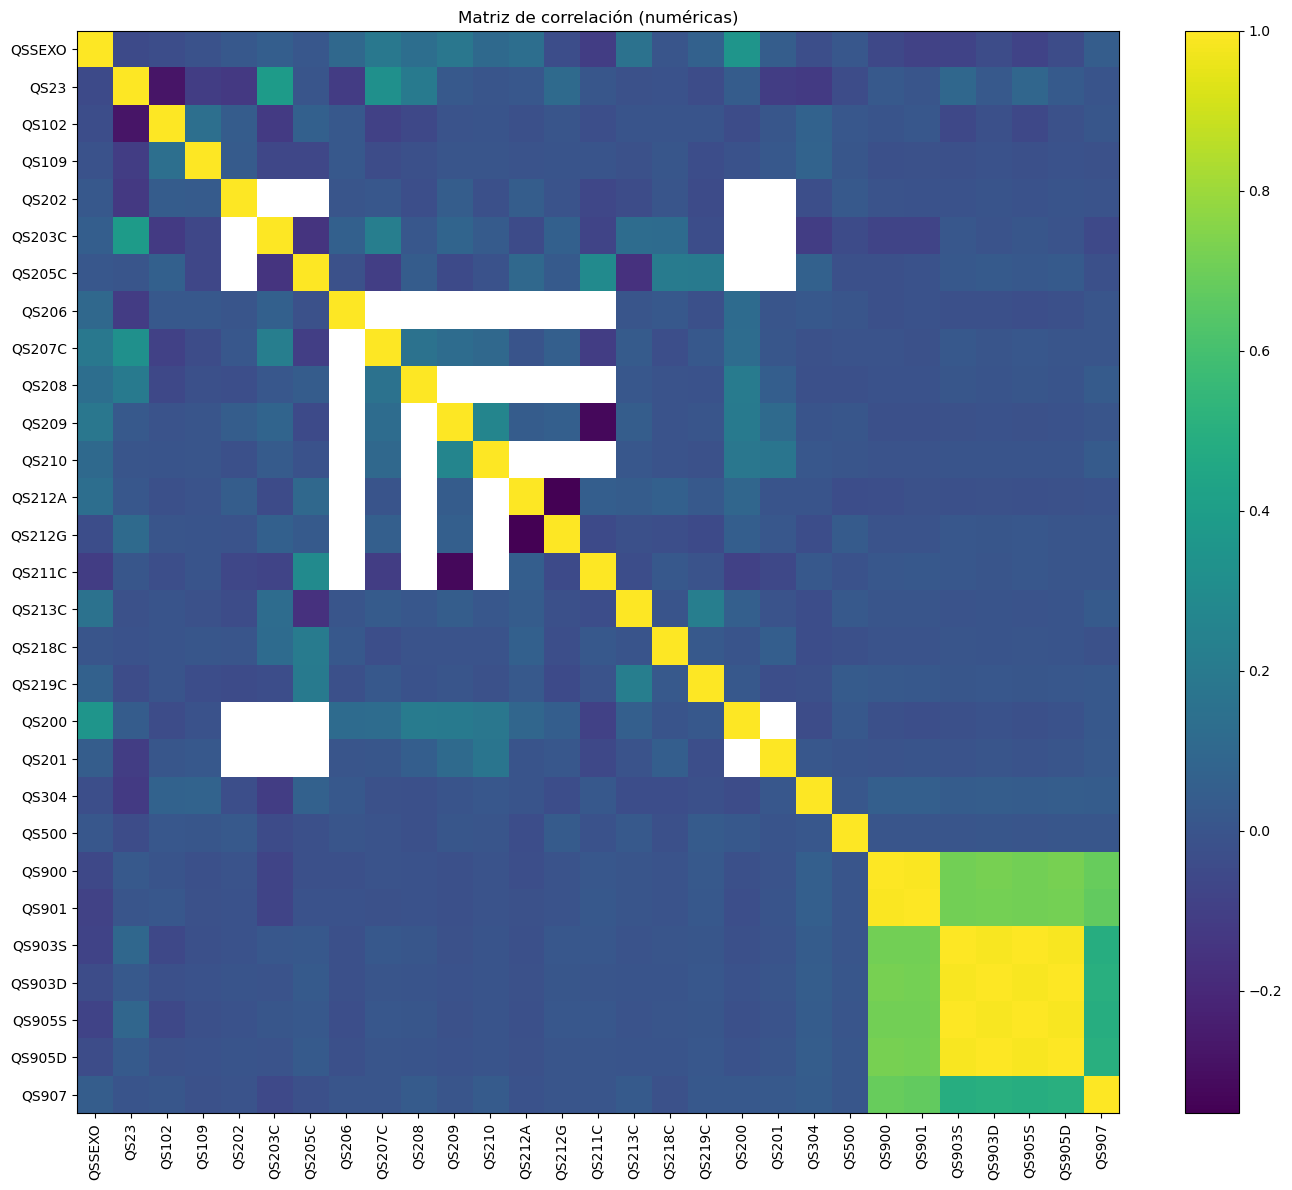

In [69]:
# Correlaciones numéricas (heatmap)
num_cols = data.select_dtypes(include=['int64','float64']).columns
corr = data[num_cols].corr()
plt.figure(figsize=(14,12))
im = plt.imshow(corr, interpolation='nearest', aspect='auto')
plt.title('Matriz de correlación (numéricas)')
plt.colorbar(im)
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.tight_layout()
plt.show()

### 3.4 Diagnóstico de calidad inicial

In [70]:
# Valores faltantes
print(data.isnull().sum())

QSSEXO        0
QS23          0
QS102         3
QS109         3
QS202     28588
QS203C    31128
QS205C    31128
QS206        17
QS207C     2959
QS208      2598
QS209     10355
QS210     10355
QS212A    21172
QS212G    21172
QS211C    21172
QS213C     3050
QS218C    26069
QS219C     8706
QS200        17
QS201     26555
QS304     23298
QS500        27
QS900        35
QS901        35
QS903S       33
QS903D       33
QS905S       33
QS905D       33
QS907        33
dtype: int64


In [71]:
# Posibles inconsistencias
print("Mínimo y máximo edad:", data['QS23'].min(), data['QS23'].max())
print("Peso mínimo y máximo:", data['QS900'].min(), data['QS900'].max())
print("Talla mínima y máxima:", data['QS901'].min(), data['QS901'].max())
print("Perímetro abdominal min/max:", data['QS907'].min(), data['QS907'].max())
print("Edad en la que primera vez consumio bebidas alcoholicas:",data['QS207C'].min(), data['QS207C'].max() )
print("Cantidad de dias que tomo en un mes",data['QS211C'].min(), data['QS211C'].max() )

Mínimo y máximo edad: 15 97
Peso mínimo y máximo: 24.5 999.9
Talla mínima y máxima: 119.0 999.9
Perímetro abdominal min/max: 55.0 999.9
Edad en la que primera vez consumio bebidas alcoholicas: 5.0 68.0
Cantidad de dias que tomo en un mes 1.0 30.0


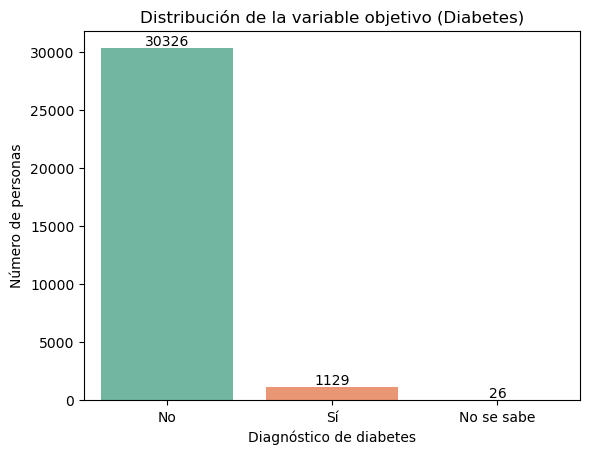

In [72]:
# Distribución de diabetes
data.loc[:, 'DIABETES'] = data['QS109'].map({1: "Sí", 2: "No", 8: "No se sabe"})

ax = sns.countplot(x='DIABETES', hue='DIABETES', data=data, palette='Set2', legend=False)

plt.title("Distribución de la variable objetivo (Diabetes)")
plt.xlabel("Diagnóstico de diabetes")
plt.ylabel("Número de personas")

# Agregar etiquetas con el valor exacto sobre cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.show()

El gráfico muestra la distribución de la variable objetivo **diabetes** (QS109) en la población encuestada, donde la mayoría de personas no presenta diagnóstico de diabetes (“No”), mientras que solo una fracción reducida reporta haber sido diagnosticada (“Sí”) y un número mínimo indicó “No se sabe”. Esto refleja un fuerte desbalance de clases, con muchos más casos negativos que positivos en la muestra.

In [73]:
#Valores faltantes: identificar y cuantificar (df.isnull().sum()).
na_counts = data.isna().sum().sort_values(ascending=False)
na_pct = (na_counts/len(data)*100).round(2)
quality_missing = pd.DataFrame({'missing': na_counts, 'missing_%': na_pct})
display(quality_missing)

,missing,missing_%
QS203C,31128,98.87
QS205C,31128,98.87
QS202,28588,90.80
QS201,26555,84.34
QS218C,26069,82.80
QS304,23298,74.00
QS212A,21172,67.25
QS212G,21172,67.25
QS211C,21172,67.25
QS209,10355,32.89


In [74]:
# Definir los rangos esperados
suspects = data[
    (data['QS23'] < 15) | (data['QS23'] > 100) |         # Edad fuera de rango
    (data['QS900'] < 30) | (data['QS900'] > 200) |       # Peso (kg)
    (data['QS901'] < 120) | (data['QS901'] > 220) |      # Talla (cm)
    (data['QS907'] < 50) | (data['QS907'] > 200)         # Perímetro abdominal (cm)
]

print("Número de registros sospechosos (fuera de rangos):", len(suspects))

# Mostrar algunos ejemplos
display(suspects[['QS23','QS900','QS901','QS907']].head(10))

Número de registros sospechosos (fuera de rangos): 840


,QS23,QS900,QS901,QS907
60,28,76.0,163.5,999.9
88,20,50.8,147.2,999.9
113,23,52.7,154.5,999.9
114,25,57.3,157.2,999.9
152,87,999.9,999.9,999.9
217,22,75.7,163.5,999.9
271,41,57.2,149.2,999.9
299,50,999.9,999.9,999.9
401,23,999.9,999.9,999.9
404,35,999.9,999.9,999.9


### 3.5 Perfil estadístico comparativo (Diagnosticados con diabetes vs NO Diagnosticados con diabetes)

In [75]:
# Medias comparativas numéricas (solo variables seleccionadas)
cols = [
    'QS23', 'QS203C', 'QS205C', 'QS207C', 'QS211C',
    'QS213C', 'QS218C', 'QS219C', 'QS900', 'QS901',
    'QS903S', 'QS903D', 'QS905S', 'QS905D', 'QS907'
]

data.groupby('QS109')[cols].mean(numeric_only=True)

,QS23,QS203C,QS205C,QS207C,QS211C,QS213C,QS218C,QS219C,QS900,QS901,QS903S,QS903D,QS905S,QS905D,QS907
QS109,,,,,,,,,,,,,,,
1.0,55.651019,29.125000,5.470588,20.441484,1.904478,4.423729,1.158974,3.661220,94.297163,177.223138,135.655142,86.869681,133.695922,85.990248,127.529078
2.0,39.277880,25.508824,4.244838,19.072193,1.852171,4.313937,1.171010,3.224923,78.409325,167.318881,122.811830,80.871307,121.069380,80.023732,114.542866
8.0,60.923077,NaN,NaN,19.650000,2.166667,3.238095,2.000000,3.000000,60.761538,151.169231,117.961538,72.269231,116.038462,70.538462,91.853846


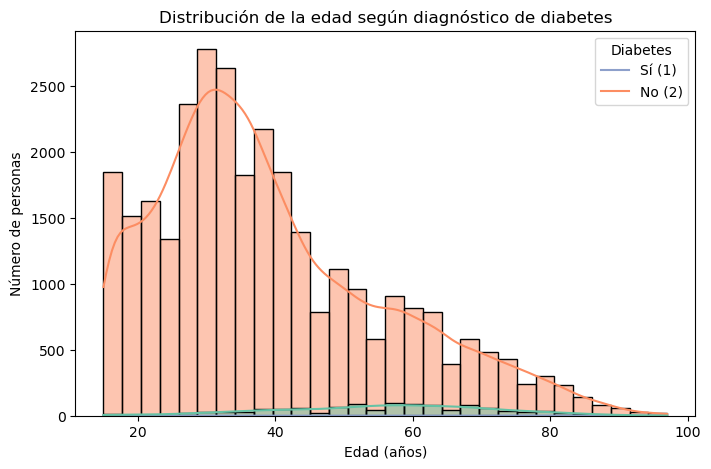

In [76]:
# Comparación gráfica de variables numéricas
plt.figure(figsize=(8,5))
sns.histplot(data=data, x='QS23', hue='QS109', bins=30, kde=True, palette='Set2')
plt.title("Distribución de la edad según diagnóstico de diabetes")
plt.xlabel("Edad (años)")
plt.ylabel("Número de personas")
plt.legend(title="Diabetes", labels=["Sí (1)", "No (2)"])
plt.show()

In [77]:
# Lista de columnas seleccionadas
cols = [
    'QS23', 'QS203C', 'QS205C', 'QS207C', 'QS211C',
    'QS213C', 'QS218C', 'QS219C', 'QS900', 'QS901',
    'QS903S', 'QS903D', 'QS905S', 'QS905D', 'QS907'
]

# Perfil estadístico comparativo (diagnosticados vs no diagnosticados)
perfil_num = data.groupby('QS109')[cols].agg(['mean','median','std','min','max']).round(3)

display(perfil_num)

QS23                         QS203C                             ...  \
         mean median     std min max    mean median     std   min   max  ...   
QS109                                                                    ...   
1.0    55.651   57.0  15.554  15  92  29.125   25.0  12.580  17.0  57.0  ...   
2.0    39.278   36.0  16.721  15  97  25.509   21.0  11.475  10.0  78.0  ...   
8.0    60.923   63.0  20.758  17  94     NaN    NaN     NaN   NaN   NaN  ...   

       QS905D                                QS907                        \
         mean median     std   min    max     mean median      std   min   
QS109                                                                      
1.0    85.990   75.5  95.379  42.0  999.0  127.529   98.3  161.126  64.2   
2.0    80.024   73.0  77.656  40.0  999.0  114.543   90.9  145.347  55.0   
8.0    70.538   71.5   9.729  42.0   90.0   91.854   91.9   12.191  68.5   

              
         max  
QS109         
1.0    999.9  
2.0    999.9  
8.0    111.6  

[3 rows x 75 columns]

### 3.6 Hallazgos

#### Hallazgos del Paso 3: Descriptive analysis

##### 1. Distribución general del dataset
- El dataset contiene **31018 registros y 29 variables**.
- Las variables abarcan información demográfica (edad, sexo), clínica (peso, talla, perímetro abdominal, presión arterial, hipertensión) y de estilo de vida/dieta (tabaco, alcohol, frutas, verduras, jugos).
- La variable objetivo es QS109 (diagnóstico de diabetes o azúcar alta).


##### 2. Variables principales
- **Sexo**: Distribución relativamente equilibrada entre hombres y mujeres. 
- **Hipertensión (QS102)**: Se observa una proporción significativa de personas diagnosticadas, lo cual es un factor de riesgo.  
- **Consumo de tabaco y alcohol**: Predominan respuestas “No consume”, lo que muestra baja prevalencia en la muestra.
- **Edad (QS23)**: el rango va de jóvenes adultos hasta personas mayores. Se concentra más en adultos de mediana edad. 
- **Peso, talla y perímetro abdominal**: Se identifican valores coherentes con el rango esperado, pero también aparecen registros anormales codificados como 999, lo que no representa un valor real. Estos deben tratarse como valores faltantes para no distorsionar los análisis.  
- **Presión arterial**: existen casos con valores elevados, lo que puede asociarse a riesgo cardiovascular.

##### 4. Valores faltantes
- Hay valores nulos en algunas variables, especialmente en preguntas de dieta y consumo.  
- Además, se detectaron valores atípicos artificiales (999) en variables como peso, talla, perímetro abdominal y tambien en la edad de consumo por primera vez, lo cual refleja errores de captura o registros sin respuesta.
- Estos valores deben ser recodificados como NaN para evitar que afecten estadísticas y modelos.

##### 5. Correlaciones
- Existe correlación positiva entre peso, perímetro abdominal y presión arterial, lo que refleja el efecto de la obesidad sobre la salud cardiovascular.  
- Edad se asocia con mayor prevalencia de hipertensión y diabetes.
- El análisis comparativo sugiere que personas mayores y con mayor perímetro abdominal tienen más probabilidad de diagnóstico positivo de diabetes.

##### 6. Perfil comparativo: con diabetes vs sin diabetes
- Con diagnóstico de diabetes: tienden a ser de mayor edad, con valores más altos en perímetro abdominal y mayor prevalencia de hipertensión.
- Sin diagnóstico: suelen ser más jóvenes, con menor perímetro abdominal y menos casos de hipertensión.


# 📌 Fase 3. Data Preparation

## 🧹 4. Data Cleaning

#### 4.1 Selección inicial de variables claves

Queremos construir un modelo que prediga si una persona puede tener diabetes (1) o no (0) sin usar exámenes de laboratorio o mediciones de sangre. Por ello, conservaremos factores como datos demográficos, hábitos de vida, alimentación, mediciones antropométricas, presión arterial y antecedentes relevantes de salud.

🔴 **Variables candidatas a eliminar:**
Estas no aportan a la predicción de diabetes porque son identificadores, redundantes o menos relevantes en el foco de salud metabólica.  

- **QS200** → En los  últimos 12 meses ha fumado cigarrillos.
- **QS201** → En los últimos 30 días ha fumado cigarrillos.    
- **QS210** → En los últimos 30 días ha consumido bebidas alcohólicas.  
- **QS212A** → Tomó cerveza  
- **QS212G** → Tomó Whisky/pisco /ron  
- **QS218C** → Cantidad porciones ensalada frutas.
- **QS304** → Le han diagnosticado Catarata 
- **QS903S** → Primera medición presión arterial sistólica.
- **QS903D** → Primera medición presión arterial diastólica.
- **QS905S** → Segunda medición presión arterial sistólica.  
- **QS905D** → Segunda medición presión arterial diastólica.  

---

🟢 **Variables candidatas a conservar:**
Estas sí son relevantes porque se relacionan directamente con factores de riesgo y diagnóstico de diabetes:  

📊 **Datos demográficos** 
- **QS23** → Edad del entrevistado (años cumplidos).  
- **QSSEXO** → Sexo del entrevistado.  

---

🚬🍷 **Hábitos y estilo de vida**  
- **QS202** → Fuma diariamente.  
- **QS203C** → Edad que empezó a fumar diariamente.  
- **QS205C** → Cantidad de cigarrillos diarios que fuma.  
- **QS206** → Ha consumido alguna vez bebidas alcohólicas. 
- **QS207C** → Edad primera vez que tomo bebidas alcohólicas.
- **QS208** → En los últimos 12 meses ha consumido alguna bebida alcohólica.  
- **QS209** → En los últimos 12 meses, tomó bebidas alcohólicas 12 o más días.  
- **QS211C** → Cantidad de veces que tomo en un mes.  
- **QS213C** → Cantidad de días que consumió frutas.  
- **QS219C** → Días que comió ensalada de verduras.  

---

🩺 **Mediciones clínicas**  
- **QS900** → Personas de 15 años a màs de edad - Peso en kilogramos.  
- **QS901** → Personas de 15 años a màs de edad - Talla en centímetros.  
- **QS907** → Perímetro abdominal (cm).  

---

⚕️ **Antecedentes y diagnóstico**  
- **QS102** → ¿Alguna vez un médico u otro profesional de la salud le dijo que tenía hipertensión?  
- **QS304** → Le han diagnosticado Catarata.  
- **QS500** → Actualmente tiene tos con flema.  

---

🎯 **Variable objetivo**  
- **QS109** → Le diagnosticaron diabetes.

In [78]:
# Variables candidatas a conservar
features_keep = ["QS23", "QSSEXO",
    "QS202", "QS203C", "QS205C",
    "QS206", "QS207C", "QS208", "QS209", 
    "QS211C","QS213C", "QS219C","QS900", 
    "QS901", "QS907", "QS102",
    "QS304", "QS500"]

# Variable objetivo
target = ["QS109"]  # Le diagnosticaron diabetes

# Crear nuevo DataFrame solo con estas variables
df_sel = data[features_keep+target]

# Información básica del nuevo dataset
print("df_sel.shape:", df_sel.shape)
print("df_sel.columns:", df_sel.columns.tolist())
df_sel.head(10)

df_sel.shape: (31484, 19)
df_sel.columns: ['QS23', 'QSSEXO', 'QS202', 'QS203C', 'QS205C', 'QS206', 'QS207C', 'QS208', 'QS209', 'QS211C', 'QS213C', 'QS219C', 'QS900', 'QS901', 'QS907', 'QS102', 'QS304', 'QS500', 'QS109']


,QS23,QSSEXO,QS202,QS203C,QS205C,QS206,QS207C,QS208,QS209,QS211C,QS213C,QS219C,QS900,QS901,QS907,QS102,QS304,QS500,QS109
0,38,2,NaN,NaN,NaN,1.0,17.0,2.0,NaN,NaN,NaN,6.0,70.4,152.5,98.9,2.0,NaN,1.0,2.0
1,17,2,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,3.0,7.0,49.8,160.2,68.4,2.0,NaN,2.0,2.0
2,65,2,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,7.0,6.0,49.7,136.2,86.3,2.0,2.0,2.0,2.0
3,33,1,2.0,NaN,NaN,1.0,17.0,1.0,2.0,4.0,7.0,2.0,76.0,158.2,100.4,2.0,NaN,2.0,2.0
4,30,1,NaN,NaN,NaN,1.0,21.0,2.0,NaN,NaN,5.0,NaN,66.0,159.4,87.2,2.0,NaN,2.0,2.0
5,32,2,NaN,NaN,NaN,1.0,18.0,1.0,2.0,NaN,7.0,2.0,72.9,157.0,91.7,2.0,NaN,2.0,2.0
6,34,2,NaN,NaN,NaN,1.0,26.0,2.0,NaN,NaN,3.0,4.0,57.3,153.3,80.2,2.0,NaN,2.0,2.0
7,18,2,NaN,NaN,NaN,1.0,17.0,1.0,2.0,NaN,3.0,3.0,67.6,151.5,93.2,2.0,NaN,2.0,2.0
8,45,1,NaN,NaN,NaN,1.0,19.0,1.0,2.0,1.0,2.0,6.0,85.7,171.6,101.1,2.0,NaN,2.0,2.0
9,33,2,NaN,NaN,NaN,1.0,24.0,1.0,1.0,1.0,7.0,7.0,81.2,158.3,108.1,2.0,NaN,2.0,2.0


In [79]:
#  Revisar duplicados (en todo el registro de estas columnas)
duplicates_count = df_sel.duplicated().sum()
# df_sel = df_sel.drop_duplicates()
duplicates_count

1

In [80]:
# Revisar valores faltantes
df_sel.isnull().sum()

# Conteo total de valores nulos en el DataFrame
print("Total de valores nulos:", df_sel.isnull().sum().sum())

Total de valores nulos: 163135


In [81]:
#  Porcentaje de valores nulos por columna (más útil para limpieza)
print("\nPorcentaje de nulos por columna:")
print((df_sel.isnull().mean() * 100).round(2))


Porcentaje de nulos por columna:
QS23       0.00
QSSEXO     0.00
QS202     90.80
QS203C    98.87
QS205C    98.87
QS206      0.05
QS207C     9.40
QS208      8.25
QS209     32.89
QS211C    67.25
QS213C     9.69
QS219C    27.65
QS900      0.11
QS901      0.11
QS907      0.10
QS102      0.01
QS304     74.00
QS500      0.09
QS109      0.01
dtype: float64


**Observación**  
Como podemos visualizar existen columanas que tienen una gran cantidad de datos nulos, más del 60%, así que estas vamos a tener que imputarlas porque no aportarán en nada a nuestro modelo.

In [82]:
# Eliminamos las columnas que tengan más del 60% de datos vacios
# Calcular porcentaje de nulos por columna
porc_nulos = df_sel.isna().mean() * 100

# Seleccionar columnas con más del 60% de nulos
cols_a_eliminar = porc_nulos[porc_nulos > 60].index.tolist()

print("Columnas a eliminar (>60% nulos):", cols_a_eliminar)

# Eliminar esas columnas
df_sel = df_sel.drop(columns=cols_a_eliminar)

# Eliminar las columnas
df_sel = df_sel.drop(columns=["QS206", "QS209"])


# Verificar tamaño final del dataset
print("Dataframe final:", df_sel.shape)

Columnas a eliminar (>60% nulos): ['QS202', 'QS203C', 'QS205C', 'QS211C', 'QS304']
Dataframe final: (31484, 12)


In [83]:
#  Porcentaje de valores nulos por columna (verificamos)
print("\nPorcentaje de nulos por columna:")
print((df_sel.isnull().mean() * 100).round(2))


Porcentaje de nulos por columna:
QS23       0.00
QSSEXO     0.00
QS207C     9.40
QS208      8.25
QS213C     9.69
QS219C    27.65
QS900      0.11
QS901      0.11
QS907      0.10
QS102      0.01
QS500      0.09
QS109      0.01
dtype: float64


In [84]:
# Eliminar filas con QS109 nulo
df_limpio = df_sel.dropna(subset=["QS109"])

# Eliminar filas con QS208 nulo
df_limpio = df_sel.dropna(subset=["QS208"])

# Eliminar filas con QS500 nulo
df_limpio = df_limpio.dropna(subset=["QS500"])

#  Porcentaje de valores nulos por columna (verificamos)
print("\nPorcentaje de nulos por columna:")
print((df_limpio.isnull().mean() * 100).round(2))

# Verificar tamaño del dataset
print("Dataframe final:", df_limpio.shape)


Porcentaje de nulos por columna:
QS23       0.00
QSSEXO     0.00
QS207C     1.24
QS208      0.00
QS213C     9.56
QS219C    26.96
QS900      0.03
QS901      0.03
QS907      0.02
QS102      0.00
QS500      0.00
QS109      0.00
dtype: float64
Dataframe final: (28876, 12)


In [85]:
from IPython.display import Markdown, display

# Diccionario de etiquetas (Código → Descripción)
labels = {
    'QS208': "Sfsdsfdsf"
}

# Conteo de valores únicos con etiqueta arriba
for col in labels.keys():
    display(Markdown(f"\n##### {col} → {labels[col]}"))
    print(df_limpio[col].value_counts())



# Conteo de la variable objetivo
display(Markdown("\n\n### QS109 → Le diagnosticaron diabetes"))
df_limpio["QS109"].value_counts()


##### QS208 → Sfsdsfdsf

QS208
1.0    21124
2.0     7746
8.0        6
Name: count, dtype: int64




### QS109 → Le diagnosticaron diabetes

QS109
2.0    27771
1.0     1081
8.0       24
Name: count, dtype: int64

In [86]:
# Reemplazamos los NA por el promedio
cols_promedio = ["QS213C","QS207C" ,"QS900", "QS901", "QS907", "QS219C"]

for col in cols_promedio:
    df_limpio[col] = pd.to_numeric(df_limpio[col], errors="coerce")
    df_limpio[col] = df_limpio[col].fillna(df_limpio[col].mean())

#  Porcentaje de valores nulos por columna (verificamos)
print("\nPorcentaje de nulos por columna:")
print((df_limpio.isnull().mean() * 100).round(2))


Porcentaje de nulos por columna:
QS23      0.0
QSSEXO    0.0
QS207C    0.0
QS208     0.0
QS213C    0.0
QS219C    0.0
QS900     0.0
QS901     0.0
QS907     0.0
QS102     0.0
QS500     0.0
QS109     0.0
dtype: float64


In [87]:
# Verificamos si hay datos vacios
print("¿Hay nulos en el dataset?:", df_limpio.isnull().values.any())

¿Hay nulos en el dataset?: False


In [91]:
df_limpio.head(10)

,QS23,QSSEXO,QS207C,QS208,QS213C,QS219C,QS900,QS901,QS907,QS102,QS500,QS109
0,38,2,17.0,2.0,4.315413,6.000000,70.4,152.5,98.9,2.0,1.0,2.0
3,33,1,17.0,1.0,7.000000,2.000000,76.0,158.2,100.4,2.0,2.0,2.0
4,30,1,21.0,2.0,5.000000,3.253995,66.0,159.4,87.2,2.0,2.0,2.0
5,32,2,18.0,1.0,7.000000,2.000000,72.9,157.0,91.7,2.0,2.0,2.0
6,34,2,26.0,2.0,3.000000,4.000000,57.3,153.3,80.2,2.0,2.0,2.0
7,18,2,17.0,1.0,3.000000,3.000000,67.6,151.5,93.2,2.0,2.0,2.0
8,45,1,19.0,1.0,2.000000,6.000000,85.7,171.6,101.1,2.0,2.0,2.0
9,33,2,24.0,1.0,7.000000,7.000000,81.2,158.3,108.1,2.0,2.0,2.0
10,36,2,17.0,1.0,7.000000,7.000000,51.3,156.1,77.7,1.0,2.0,2.0
11,36,2,19.0,1.0,1.000000,7.000000,56.8,155.7,91.2,2.0,1.0,2.0


In [92]:
# Verificar tamaño final del dataset
print("Dataframe final:", df_limpio.shape)

Dataframe final: (28851, 12)


**Observación**
Ahora vamos a eliminar los registros que tengan valor **8 = "No lo sé"** en **QS208, QS209, QS102**, porque solo generan ruido.

In [93]:
# Eliminar registros donde QS208, QS209 o QS102 tengan el valor 8
df_limpio = df_limpio[~df_limpio[["QS208", "QS102"]].isin([8]).any(axis=1)]

# Verificar tamaño final
print("Shape después de eliminar registros con '8':", df_limpio.shape)

Shape después de eliminar registros con '8': (28851, 12)


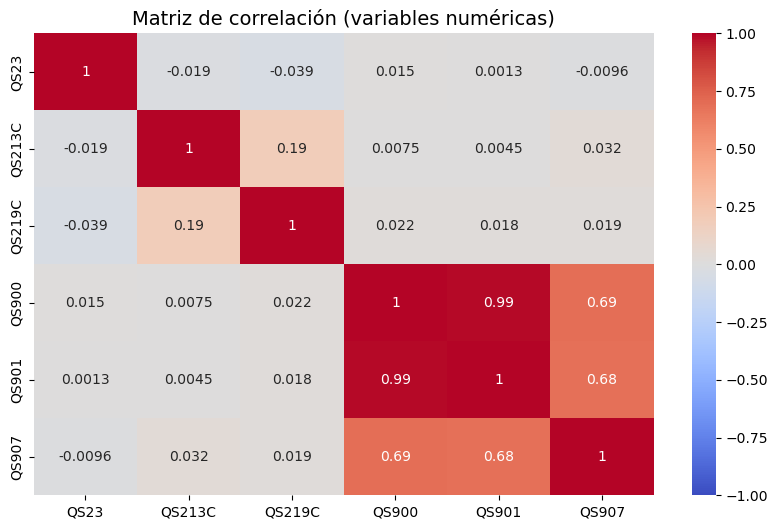

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
cols_num = ["QS23", "QS213C", "QS219C", "QS900", "QS901", "QS907"]

# Calcular matriz de correlación
corr = df_limpio[cols_num].corr()

# Graficar heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, vmin=-1, vmax=1)
plt.title("Matriz de correlación (variables numéricas)", fontsize=14)
plt.show()

In [95]:
corr_target = df_limpio[cols_num + ["QS109"]].corr()["QS109"].sort_values(ascending=False)
print(corr_target)

QS109     1.000000
QS213C   -0.013989
QS907    -0.014653
QS901    -0.015756
QS900    -0.021759
QS219C   -0.028464
QS23     -0.108501
Name: QS109, dtype: float64


#### 4.2 Analisis de OutLiers del data frame df_limpio

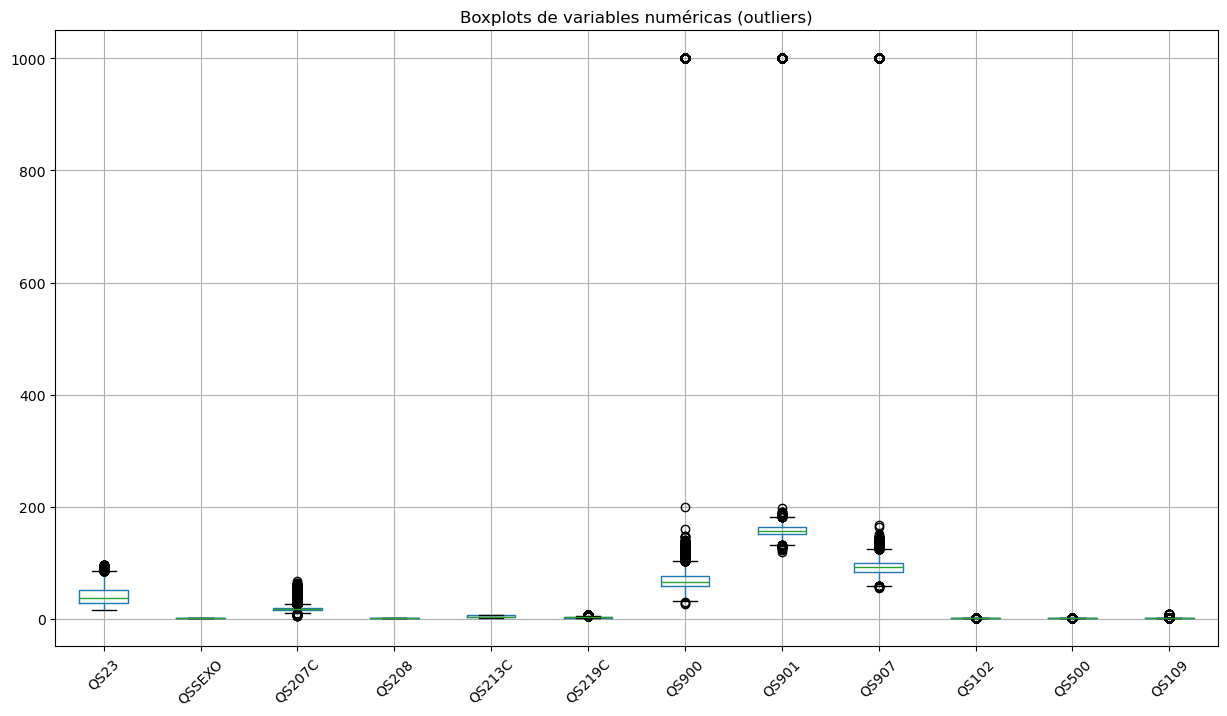

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo columnas numéricas
num_cols = df_limpio.select_dtypes(include=['float64', 'int64']).columns

# Crear boxplots
plt.figure(figsize=(15, 8))
df_limpio[num_cols].boxplot()
plt.title("Boxplots de variables numéricas (outliers)")
plt.xticks(rotation=45)
plt.show()


In [97]:
# Hacer una copia del dataset limpio
df_sin_outliers = df_limpio.copy()

# Función para recortar (winsorizar)
def cortar_outliers(df, col, min_val, max_val):
    df[col] = df[col].clip(lower=min_val, upper=max_val)
    return df

# Aplicar cortes en variables numéricas con rangos lógicos
df_sin_outliers = cortar_outliers(df_sin_outliers, "QS207C", 5, 70)     # edad primera vez alcohol
df_sin_outliers = cortar_outliers(df_sin_outliers, "QS900", 30, 200)    # peso
df_sin_outliers = cortar_outliers(df_sin_outliers, "QS901", 120, 210)   # talla
df_sin_outliers = cortar_outliers(df_sin_outliers, "QS907", 40, 160)    # perímetro abdominal

# Verificar cambios
print(df_sin_outliers[["QS207C","QS900","QS901","QS907"]].describe())


            QS207C         QS900         QS901         QS907
count  28851.00000  28851.000000  28851.000000  28851.000000
mean      19.11910     69.224233    157.676500     93.389982
std        4.83983     20.380810     10.491819     15.914446
min        5.00000     30.000000    120.000000     55.000000
25%       16.00000     57.900000    150.700000     83.700000
50%       18.00000     66.400000    156.600000     91.700000
75%       20.00000     76.000000    163.300000     99.900000
max       68.00000    200.000000    210.000000    160.000000


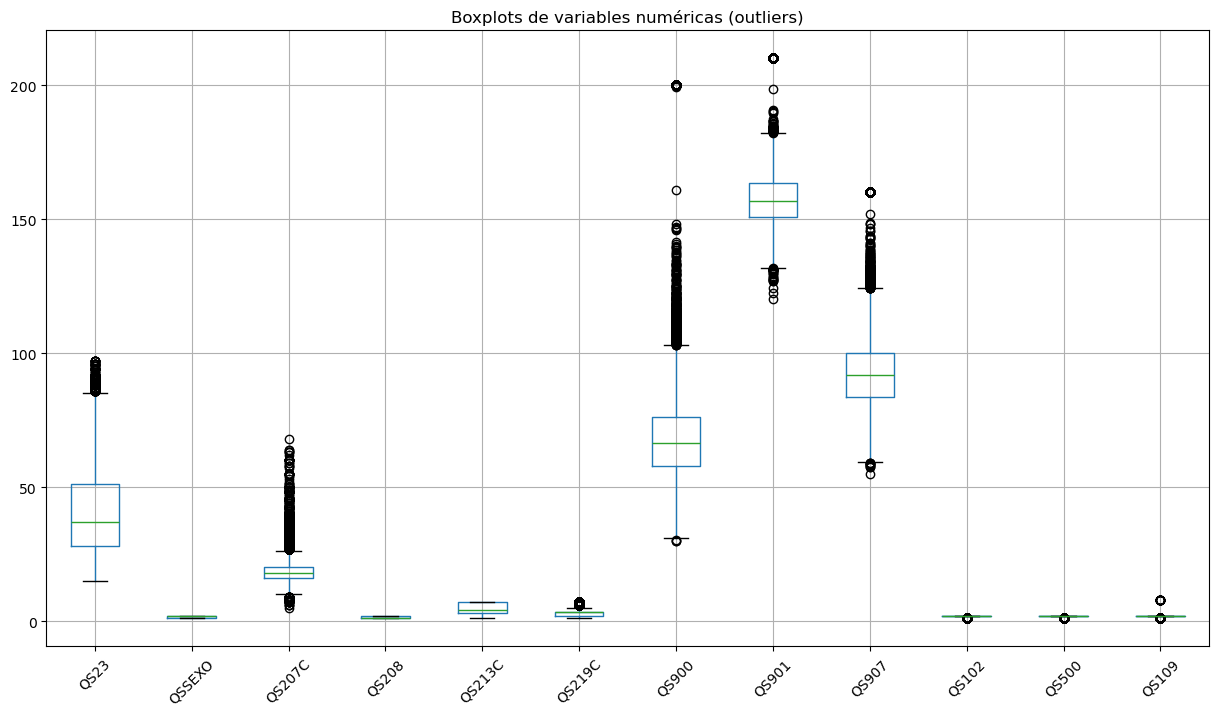

In [98]:
# Seleccionar solo columnas numéricas
num_cols = df_sin_outliers.select_dtypes(include=['float64', 'int64']).columns

# Crear boxplots
plt.figure(figsize=(15, 8))
df_sin_outliers[num_cols].boxplot()
plt.title("Boxplots de variables numéricas (outliers)")
plt.xticks(rotation=45)
plt.show()


##### 🧹 Y listo ya tenemos nuestra data limpia!!!!

## 🧹 5. Data transformation

En el caso de nuestra data, no es necesario utilizar el Laber Encoding para codificar nuestra variable objetivo (QS109). Sin embargo, lo que haremos sera convertir nuestro dato en un valor binario ya que por defecto este viene con 1 (Si) y 2 (No).

In [99]:
#Almacenamos los datos de la data limpia en una nueva variable para trabajar en esta
data_cod = df_sin_outliers
data_cod.head(10)

,QS23,QSSEXO,QS207C,QS208,QS213C,QS219C,QS900,QS901,QS907,QS102,QS500,QS109
0,38,2,17.0,2.0,4.315413,6.000000,70.4,152.5,98.9,2.0,1.0,2.0
3,33,1,17.0,1.0,7.000000,2.000000,76.0,158.2,100.4,2.0,2.0,2.0
4,30,1,21.0,2.0,5.000000,3.253995,66.0,159.4,87.2,2.0,2.0,2.0
5,32,2,18.0,1.0,7.000000,2.000000,72.9,157.0,91.7,2.0,2.0,2.0
6,34,2,26.0,2.0,3.000000,4.000000,57.3,153.3,80.2,2.0,2.0,2.0
7,18,2,17.0,1.0,3.000000,3.000000,67.6,151.5,93.2,2.0,2.0,2.0
8,45,1,19.0,1.0,2.000000,6.000000,85.7,171.6,101.1,2.0,2.0,2.0
9,33,2,24.0,1.0,7.000000,7.000000,81.2,158.3,108.1,2.0,2.0,2.0
10,36,2,17.0,1.0,7.000000,7.000000,51.3,156.1,77.7,1.0,2.0,2.0
11,36,2,19.0,1.0,1.000000,7.000000,56.8,155.7,91.2,2.0,1.0,2.0


In [100]:
#Empezamos la recodificacion utilizando 1 (Si) y 0 (No)
data_cod["QS109_F"] = data_cod["QS109"].apply(lambda x: 1 if x == 1 else 0)

# Verificar primeras filas
data_cod[["QS109", "QS109_F"]].head(10)

# Revisar distribución
data_cod.head(10)

,QS23,QSSEXO,QS207C,QS208,QS213C,QS219C,QS900,QS901,QS907,QS102,QS500,QS109,QS109_F
0,38,2,17.0,2.0,4.315413,6.000000,70.4,152.5,98.9,2.0,1.0,2.0,0
3,33,1,17.0,1.0,7.000000,2.000000,76.0,158.2,100.4,2.0,2.0,2.0,0
4,30,1,21.0,2.0,5.000000,3.253995,66.0,159.4,87.2,2.0,2.0,2.0,0
5,32,2,18.0,1.0,7.000000,2.000000,72.9,157.0,91.7,2.0,2.0,2.0,0
6,34,2,26.0,2.0,3.000000,4.000000,57.3,153.3,80.2,2.0,2.0,2.0,0
7,18,2,17.0,1.0,3.000000,3.000000,67.6,151.5,93.2,2.0,2.0,2.0,0
8,45,1,19.0,1.0,2.000000,6.000000,85.7,171.6,101.1,2.0,2.0,2.0,0
9,33,2,24.0,1.0,7.000000,7.000000,81.2,158.3,108.1,2.0,2.0,2.0,0
10,36,2,17.0,1.0,7.000000,7.000000,51.3,156.1,77.7,1.0,2.0,2.0,0
11,36,2,19.0,1.0,1.000000,7.000000,56.8,155.7,91.2,2.0,1.0,2.0,0


In [101]:
# Lista de columnas 1/2 a recodificar
cols_to_recode = ["QS102", "QS208", "QS500"]

# Recodificación
for col in cols_to_recode:
    data_cod[col + "_F"] = data_cod[col].apply(lambda x: 1 if x == 1 else 0)

# Verificar con un ejemplo
data_cod.head(10)


,QS23,QSSEXO,QS207C,QS208,QS213C,QS219C,QS900,QS901,QS907,QS102,QS500,QS109,QS109_F,QS102_F,QS208_F,QS500_F
0,38,2,17.0,2.0,4.315413,6.000000,70.4,152.5,98.9,2.0,1.0,2.0,0,0,0,1
3,33,1,17.0,1.0,7.000000,2.000000,76.0,158.2,100.4,2.0,2.0,2.0,0,0,1,0
4,30,1,21.0,2.0,5.000000,3.253995,66.0,159.4,87.2,2.0,2.0,2.0,0,0,0,0
5,32,2,18.0,1.0,7.000000,2.000000,72.9,157.0,91.7,2.0,2.0,2.0,0,0,1,0
6,34,2,26.0,2.0,3.000000,4.000000,57.3,153.3,80.2,2.0,2.0,2.0,0,0,0,0
7,18,2,17.0,1.0,3.000000,3.000000,67.6,151.5,93.2,2.0,2.0,2.0,0,0,1,0
8,45,1,19.0,1.0,2.000000,6.000000,85.7,171.6,101.1,2.0,2.0,2.0,0,0,1,0
9,33,2,24.0,1.0,7.000000,7.000000,81.2,158.3,108.1,2.0,2.0,2.0,0,0,1,0
10,36,2,17.0,1.0,7.000000,7.000000,51.3,156.1,77.7,1.0,2.0,2.0,0,1,1,0
11,36,2,19.0,1.0,1.000000,7.000000,56.8,155.7,91.2,2.0,1.0,2.0,0,0,1,1


In [102]:
# Recodificamos el sexo: 0 = Hombre y 1 = Mujer
data_cod["QSSEXO_F"] = data_cod["QSSEXO"].apply(lambda x: 1 if x == 2 else 0)
data_cod.head(10)

,QS23,QSSEXO,QS207C,QS208,QS213C,QS219C,QS900,QS901,QS907,QS102,QS500,QS109,QS109_F,QS102_F,QS208_F,QS500_F,QSSEXO_F
0,38,2,17.0,2.0,4.315413,6.000000,70.4,152.5,98.9,2.0,1.0,2.0,0,0,0,1,1
3,33,1,17.0,1.0,7.000000,2.000000,76.0,158.2,100.4,2.0,2.0,2.0,0,0,1,0,0
4,30,1,21.0,2.0,5.000000,3.253995,66.0,159.4,87.2,2.0,2.0,2.0,0,0,0,0,0
5,32,2,18.0,1.0,7.000000,2.000000,72.9,157.0,91.7,2.0,2.0,2.0,0,0,1,0,1
6,34,2,26.0,2.0,3.000000,4.000000,57.3,153.3,80.2,2.0,2.0,2.0,0,0,0,0,1
7,18,2,17.0,1.0,3.000000,3.000000,67.6,151.5,93.2,2.0,2.0,2.0,0,0,1,0,1
8,45,1,19.0,1.0,2.000000,6.000000,85.7,171.6,101.1,2.0,2.0,2.0,0,0,1,0,0
9,33,2,24.0,1.0,7.000000,7.000000,81.2,158.3,108.1,2.0,2.0,2.0,0,0,1,0,1
10,36,2,17.0,1.0,7.000000,7.000000,51.3,156.1,77.7,1.0,2.0,2.0,0,1,1,0,1
11,36,2,19.0,1.0,1.000000,7.000000,56.8,155.7,91.2,2.0,1.0,2.0,0,0,1,1,1


In [103]:
# Escalamos la variable numerica de edad QS23 usando StandardScaler (media=0 , sd=1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Escalar QS23 (edad)
data_cod["QS23_scaled"] = scaler.fit_transform(data_cod[["QS23"]])

# Escalar QS207C (edad_tomo_primera_vez)
data_cod["QS207C_scaled"] = scaler.fit_transform(data_cod[["QS207C"]])

# Verificar
data_cod.head(10)

,QS23,QSSEXO,QS207C,QS208,QS213C,QS219C,QS900,QS901,QS907,QS102,QS500,QS109,QS109_F,QS102_F,QS208_F,QS500_F,QSSEXO_F,QS23_scaled,QS207C_scaled
0,38,2,17.0,2.0,4.315413,6.000000,70.4,152.5,98.9,2.0,1.0,2.0,0,0,0,1,1,-0.148336,-0.437854
3,33,1,17.0,1.0,7.000000,2.000000,76.0,158.2,100.4,2.0,2.0,2.0,0,0,1,0,0,-0.448631,-0.437854
4,30,1,21.0,2.0,5.000000,3.253995,66.0,159.4,87.2,2.0,2.0,2.0,0,0,0,0,0,-0.628809,0.388636
5,32,2,18.0,1.0,7.000000,2.000000,72.9,157.0,91.7,2.0,2.0,2.0,0,0,1,0,1,-0.508690,-0.231231
6,34,2,26.0,2.0,3.000000,4.000000,57.3,153.3,80.2,2.0,2.0,2.0,0,0,0,0,1,-0.388572,1.421748
7,18,2,17.0,1.0,3.000000,3.000000,67.6,151.5,93.2,2.0,2.0,2.0,0,0,1,0,1,-1.349518,-0.437854
8,45,1,19.0,1.0,2.000000,6.000000,85.7,171.6,101.1,2.0,2.0,2.0,0,0,1,0,0,0.272078,-0.024609
9,33,2,24.0,1.0,7.000000,7.000000,81.2,158.3,108.1,2.0,2.0,2.0,0,0,1,0,1,-0.448631,1.008503
10,36,2,17.0,1.0,7.000000,7.000000,51.3,156.1,77.7,1.0,2.0,2.0,0,1,1,0,1,-0.268454,-0.437854
11,36,2,19.0,1.0,1.000000,7.000000,56.8,155.7,91.2,2.0,1.0,2.0,0,0,1,1,1,-0.268454,-0.024609


In [104]:
# Agrupamos las nuevas columnas en un nuevo dataset
features_keep = ["QS102_F", "QS208_F", "QS500_F",
                 "QSSEXO_F", "QS23_scaled", "QS23", "QS207C" , "QS207C_scaled", "QS900", "QS901", "QS907",
                 "QS213C", "QS219C"]

target = ["QS109_F"]

# Dataset final listo para modelar
data_encode_v1 = data_cod[features_keep + target]

print("Features:", features_keep)
print("Target:", target)
data_encode_v1.head()

Features: ['QS102_F', 'QS208_F', 'QS500_F', 'QSSEXO_F', 'QS23_scaled', 'QS23', 'QS207C', 'QS207C_scaled', 'QS900', 'QS901', 'QS907', 'QS213C', 'QS219C']
Target: ['QS109_F']


,QS102_F,QS208_F,QS500_F,QSSEXO_F,QS23_scaled,QS23,QS207C,QS207C_scaled,QS900,QS901,QS907,QS213C,QS219C,QS109_F
0,0,0,1,1,-0.148336,38,17.0,-0.437854,70.4,152.5,98.9,4.315413,6.000000,0
3,0,1,0,0,-0.448631,33,17.0,-0.437854,76.0,158.2,100.4,7.000000,2.000000,0
4,0,0,0,0,-0.628809,30,21.0,0.388636,66.0,159.4,87.2,5.000000,3.253995,0
5,0,1,0,1,-0.508690,32,18.0,-0.231231,72.9,157.0,91.7,7.000000,2.000000,0
6,0,0,0,1,-0.388572,34,26.0,1.421748,57.3,153.3,80.2,3.000000,4.000000,0


#### 🔧 Codificación y transformación de variables
En la etapa de codificacion y transformacion de variables, podriamos decir que hemos echo una recodificacion de nuestras variables. En nuestro dataset nosotros ya no es necesario utilizar el Label Encoding puesto que nuestra variable objetivo esta utilizando numeros como 1 para representar el SI y 2 para representar el NO. Es por esta razon que nostros hemos recodificado nuestras variables en binarios y escalado las que son de edad como QS23 y QS207C.

---

##### 1. Variable objetivo: `QS109`
- En nuestra variable objetivo se aplico **codificacion binaria**.
  - `SI TIENE = 1`  
  - `NO TIENE = 0`

##### 2. Variables : `"QS102", "QS208", "QS500", "QSSEXO"` 
- En estas variables, se hizo lo mismo ya que al igual que en nuestra variable objetivo. Estas columnas tambien tenian a 1 y 2 para representar un SI y un NO. Aqui tambien utilizamos la recodificacion binaria para cambiar todo esto por 1 y 0.
  - `SI TIENE = 1`  
  - `NO TIENE = 0`

- En el caso del sexo 1 representaba hombre y 2 mujer. Es por esto que tambien hemos echo esta recodificacion.
  - `HOMBRE = 1`  
  - `MUJER = 0`
Justificacion: Esta recodificación nos permite homogeneizar las variables categóricas, evitando interpretaciones incorrectas y alineándolas con los estándares de la minería de datos y de las librerías de Machine Learning. De esta manera, se facilita tanto la interpretación de los resultados como la aplicación de algoritmos de clasificación y el cálculo de métricas de desempeño. 

---

##### 3. Variable numerica: `"QS23" y "QS207C"`
- En el caso de nuestras variable de edad (edad y edad que tomo bebidas alcoholicas por primera vez), hemos decidido mantener la original y crear una nueva columa con la version escalada utilizando **StandardScaler**
- Justificacion: Hemos decidido poder conservar ambas versiones de cada variable ya que facilitan el uso de los datos en la fase del modelado. De esta manera se podra ser mas flexibles al momento de elejir el modelo que usaremos.
- 
---

##### 📌 Conclusión
- **`QS109`(Variable objetivo) → Binaria (0/1).**  
- **`QS102", "QS206", "QS208", "QS500", "QSSEXO"` → Binaria (0/1).**
- **`"QS23" y QS207C` → Original + Escalada(QS23_scaled).**

De esta manera las variables que queriamos recodificar ahora estan con valores binarios y tenemos una nueva columa con la escala de la edad. Es importante aclarar que las variables numericas no se les hicieron ningun cambio ya que estan bien asi como estan.

In [105]:
# Calcular correlaciones de todas las numéricas (sin incluir el objetivo)
corr_vars = data_encode_v1.drop(columns=["QS109_F"]).corr()

corr_vars

,QS102_F,QS208_F,QS500_F,QSSEXO_F,QS23_scaled,QS23,QS207C,QS207C_scaled,QS900,QS901,QS907,QS213C,QS219C
QS102_F,1.000000,-0.085577,0.028850,0.037543,0.332324,0.332324,0.105020,0.105020,0.038285,-0.073518,0.104128,0.003868,0.000962
QS208_F,-0.085577,1.000000,-0.024360,-0.143320,-0.203478,-0.203478,-0.153069,-0.153069,0.101116,0.172728,-0.004394,-0.015874,0.010201
QS500_F,0.028850,-0.024360,1.000000,-0.014100,0.047799,0.047799,0.006794,0.006794,-0.010640,-0.015219,-0.006901,-0.025926,-0.030603
QSSEXO_F,0.037543,-0.143320,-0.014100,1.000000,-0.064361,-0.064361,0.187220,0.187220,-0.194333,-0.572217,0.022415,0.155814,0.057119
QS23_scaled,0.332324,-0.203478,0.047799,-0.064361,1.000000,1.000000,0.316163,0.316163,-0.010592,-0.165600,0.151442,-0.019003,-0.039249
QS23,0.332324,-0.203478,0.047799,-0.064361,1.000000,1.000000,0.316163,0.316163,-0.010592,-0.165600,0.151442,-0.019003,-0.039249
QS207C,0.105020,-0.153069,0.006794,0.187220,0.316163,0.316163,1.000000,1.000000,-0.044894,-0.187787,0.055364,0.033426,0.014202
QS207C_scaled,0.105020,-0.153069,0.006794,0.187220,0.316163,0.316163,1.000000,1.000000,-0.044894,-0.187787,0.055364,0.033426,0.014202
QS900,0.038285,0.101116,-0.010640,-0.194333,-0.010592,-0.010592,-0.044894,-0.044894,1.000000,0.695100,0.751152,-0.006948,0.038601
QS901,-0.073518,0.172728,-0.015219,-0.572217,-0.165600,-0.165600,-0.187787,-0.187787,0.695100,1.000000,0.310621,-0.051688,0.016300


In [106]:
# Matriz de correlaciones de todas las variables
corr_vars = data_encode_v1.corr()

# Ordenar correlaciones con respecto a tu target QS109_F
corr_with_target = corr_vars["QS109_F"].sort_values(ascending=False)

corr_with_target

QS109_F          1.000000
QS102_F          0.200425
QS23             0.180339
QS23_scaled      0.180339
QS907            0.081170
QS207C           0.052396
QS207C_scaled    0.052396
QS900            0.043302
QS219C           0.037277
QSSEXO_F         0.018268
QS500_F          0.011779
QS213C           0.009460
QS901           -0.011627
QS208_F         -0.045711
Name: QS109_F, dtype: float64

#### 📊 Interpretación de correlaciones con QS109_F (Diabetes/Azúcar alta)

##### 1. Variables con correlación positiva (mayor probabilidad de diabetes)
- **`QS102_F` (r ≈ +0.20):** La hipertensión diagnosticada es la variable más asociada con diabetes, consistente con la literatura médica.  
- **`QS23` (Edad, r ≈ +0.18) y `QS23_scaled` (r ≈ +0.18):** A mayor edad, mayor probabilidad de diagnóstico de diabetes.  
- **`QS907` (Perímetro abdominal, r ≈ +0.08):** Existe una relación positiva moderada; perímetros más grandes se asocian a mayor riesgo de diabetes.  
- **`QS207C` (Edad primera vez que consumió alcohol, r ≈ +0.05):** Relación débil, pero sugiere que la edad de inicio podría tener alguna influencia.  
- **`QS900` (Peso, r ≈ +0.04) y `QS219C` (Días de consumo de verduras, r ≈ +0.04):** correlaciones débiles pero positivas.  

---

##### 2. Variables con correlación baja o casi nula
- **`QSSEXO_F` (Sexo, r ≈ +0.02), `QS500_F` (Tos con flema, r ≈ +0.01), `QS213C` (Frutas, r ≈ +0.01):** su relación con diabetes es prácticamente irrelevante.  

---

##### 3. Variables con correlación negativa
- **`QS901` (Talla, r ≈ -0.01):** relación mínima y negativa, probablemente sin relevancia práctica.  
- **`QS208_F` (Consumo de alcohol en últimos 12 meses, r ≈ -0.05):** relación débilmente negativa, puede reflejar un patrón inverso en la muestra pero no es fuerte.  

---

##### 📌 Conclusiones
- Las variables más relevantes para predecir diabetes son **hipertensión (`QS102_F`), edad (`QS23`), y perímetro abdominal (`QS907`)**.  
- El peso y la dieta (verduras) muestran correlaciones bajas, pero podrían complementar al modelo.  
- Variables como sexo, tos con flema y frutas no aportan información significativa.  
- El consumo de alcohol (`QS208_F`) aparece débilmente inverso, pero su efecto es muy pequeño y puede deberse a ruido en la muestra.  


/tmp/ipykernel_33/2422238330.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target_plot.values,


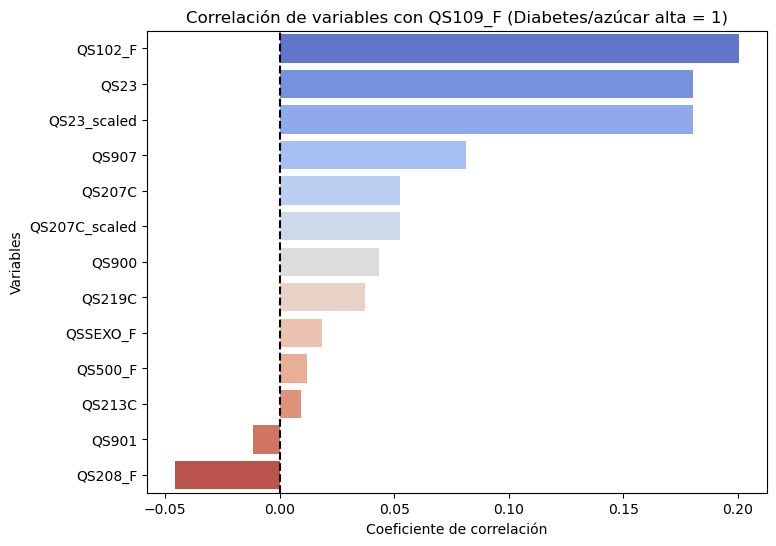

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Usar correlaciones con respecto a tu target
corr_with_target_plot = corr_with_target.drop('QS109_F')

# Crear gráfico de barras ordenado
plt.figure(figsize=(8,6))
sns.barplot(x=corr_with_target_plot.values, 
            y=corr_with_target_plot.index, 
            palette="coolwarm")

plt.title("Correlación de variables con QS109_F (Diabetes/azúcar alta = 1)")
plt.xlabel("Coeficiente de correlación")
plt.ylabel("Variables")
plt.axvline(0, color='black', linestyle='--')
plt.show()


#### Otras posibles transformaciones
- Agrupar edades en categorias como adolecente, joven, adulto, adulto_mayor.

#### Reduccion
- Por ultimo lo que haremos sera eliminar las variables que no aportan o no tienen significanzia con nuestra variable objetivo. Vamos a crear un nuevo dataframe el cual almacene solo lo esencial para en un futuro realizar los modelos.

In [108]:
# Lista de columnas que quieres mantener
columnas_seleccionadas = [
    "QS109_F", "QS102_F", "QS23", "QS23_scaled", "QS907", 
    "QS207C", "QS207C_scaled", "QS900", "QS219C", 
    "QSSEXO_F", "QS500_F", "QS213C", "QS901", "QS208_F"
]

# Crear el nuevo DataFrame solo con esas columnas
data_preparada = data_encode_v1[columnas_seleccionadas]

# Exportar a CSV
data_preparada.to_csv("data_preparada.csv", index=False, encoding="utf-8")

print("✅ El DataFrame 'data_preparada' se creó y exportó correctamente como 'data_preparada.csv'")


✅ El DataFrame 'data_preparada' se creó y exportó correctamente como 'data_preparada.csv'


### ✅  6. Data validation
Lo que haremos sera validar el dataset listo el cual es "data_preparada"

In [109]:
import pandas as pd
import numpy as np


data = pd.read_csv("data_preparada.csv",
                   low_memory=False ,
                    encoding='utf-8',      # o 'latin-1' si hay caracteres especiales
                    sep=',',               # separador (por defecto es coma)
                    header=0,              # fila que contiene los nombres de columnas
                    index_col=None)        # si quieres usar una columna como índice

data.head(10)

,QS109_F,QS102_F,QS23,QS23_scaled,QS907,QS207C,QS207C_scaled,QS900,QS219C,QSSEXO_F,QS500_F,QS213C,QS901,QS208_F
0,0,0,38,-0.148336,98.9,17.0,-0.437854,70.4,6.000000,1,1,4.315413,152.5,0
1,0,0,33,-0.448631,100.4,17.0,-0.437854,76.0,2.000000,0,0,7.000000,158.2,1
2,0,0,30,-0.628809,87.2,21.0,0.388636,66.0,3.253995,0,0,5.000000,159.4,0
3,0,0,32,-0.508690,91.7,18.0,-0.231231,72.9,2.000000,1,0,7.000000,157.0,1
4,0,0,34,-0.388572,80.2,26.0,1.421748,57.3,4.000000,1,0,3.000000,153.3,0
5,0,0,18,-1.349518,93.2,17.0,-0.437854,67.6,3.000000,1,0,3.000000,151.5,1
6,0,0,45,0.272078,101.1,19.0,-0.024609,85.7,6.000000,0,0,2.000000,171.6,1
7,0,0,33,-0.448631,108.1,24.0,1.008503,81.2,7.000000,1,0,7.000000,158.3,1
8,0,1,36,-0.268454,77.7,17.0,-0.437854,51.3,7.000000,1,0,7.000000,156.1,1
9,0,0,36,-0.268454,91.2,19.0,-0.024609,56.8,7.000000,1,1,1.000000,155.7,1


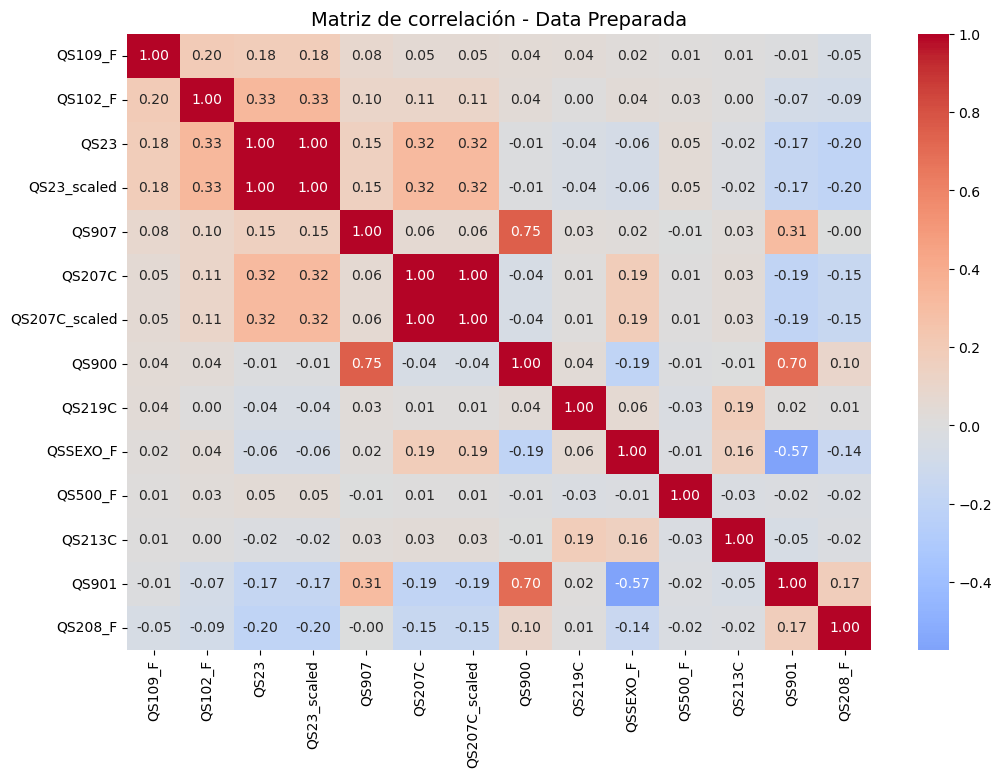

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la matriz de correlación de todo el dataframe
corr = data.corr()

# Configuración del gráfico
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")

plt.title("Matriz de correlación - Data Preparada", fontsize=14)
plt.show()


Listo, esta seria nuestra data final para poder utilizar durante la segunda unidad y todo lo que tiene relacion con el modelo que se va a realizar.